In [39]:
using JLD
using PyPlot

u_read = load("HS_test_start_from_90.dat")

u      = u_read["grid_u_c_xyzt"]
v      = u_read["grid_v_c_xyzt"]
spe_vor_final_xyz = u_read["spe_vor_c_xyzt"]
grid_t_c_xyzt = u_read["grid_t_c_xyzt"]
grid_t_eq_xyzt = u_read["grid_t_eq_xyzt"]
grid_p_full_xyzt   = u_read["grid_p_full_xyzt"]

#print((spe_vor_final_xyz))



x = range(-180,180,128)
y = range(-55, 55,64)
xx = first.(Iterators.product(x,y))
yy = last.(Iterators.product(x,y))

println(size(u))
k = 0.5*(v.^2+ u.^2)
#println(size(k[:,:,:]))

PyPlot.contourf(xx, yy, k[:,:,1,1])
PyPlot.xlabel("Longitude")
PyPlot.ylabel("Latitude")
PyPlot.title("Kinetic Energy at surface")
PyPlot.colorbar()
#PyPlot.savefig("test_start90day.png", dpi=300.)
println("over")


LoadError: ArgumentError: No file exists at given path: HS_test_start_from_90.dat

(128, 64, 20, 3)0.0CartesianIndex(120, 12, 2, 1)over


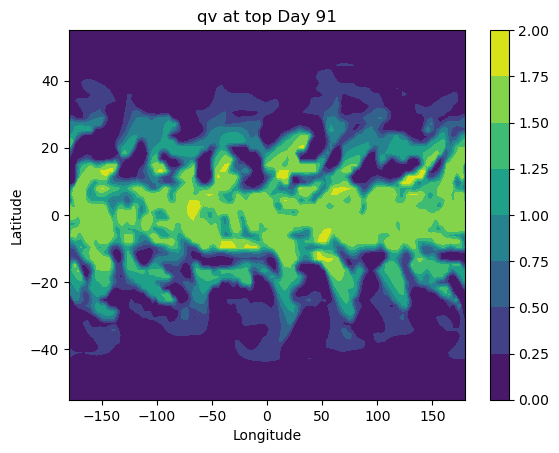

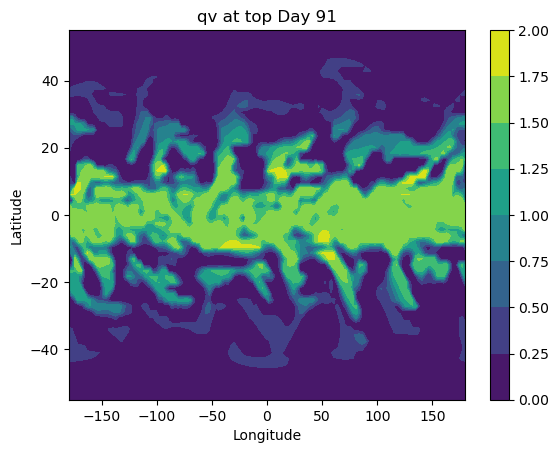

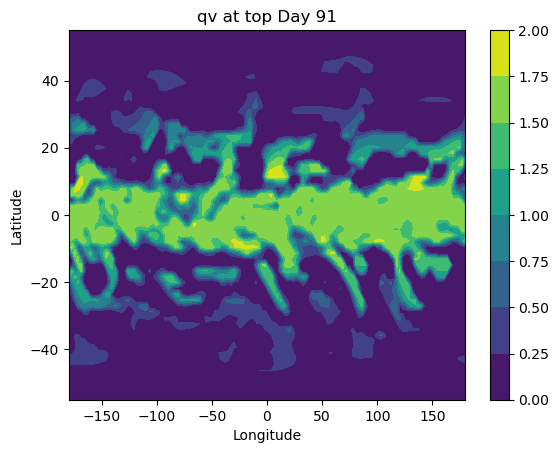

In [12]:
using JLD
using PyPlot

u_read  = load("tracers_correction_300days.dat")

qv      = u_read["grid_tracers_c_xyz1t"]

print(size(qv))
print(minimum(qv))
print(argmin(qv))
#print(maximum(qv))
x = range(-180,180,128)
y = range(-55, 55,64)
xx = first.(Iterators.product(x,y))
yy = last.(Iterators.product(x,y))

for t in collect(1:3)
    PyPlot.figure()
    PyPlot.contourf(xx, yy, qv[:,:,10,t])
    PyPlot.xlabel("Longitude")
    PyPlot.ylabel("Latitude")
    PyPlot.title("qv at top Day 91")
    PyPlot.colorbar()
    #PyPlot.savefig("test_qv3.png", dpi=300.)
    PyPlot.show()
end
println("over")

In [40]:
### using JLD
using PyPlot

u_read = load("HS_test_start_from_90.dat")

u      = u_read["grid_u_c_xyzt"]
v      = u_read["grid_v_c_xyzt"]
spe_vor_final_xyz = u_read["spe_vor_c_xyzt"]
grid_t_c_xyzt = u_read["grid_t_c_xyzt"]


#print((spe_vor_final_xyz))

x = range(-180,180,128)
y = range(-55, 55,64)
xx = first.(Iterators.product(x,y))
yy = last.(Iterators.product(x,y))

println(size(u))
#println(size(k[:,:,:]))

PyPlot.contourf(xx, yy, grid_t_c_xyzt[:,:,20,1])
PyPlot.xlabel("Longitude")
PyPlot.ylabel("Latitude")
PyPlot.title("Temperature at surface on Day 90")

cb = PyPlot.colorbar()
cb[:set_label]("[K]")
#PyPlot.savefig("test_start90day.png", dpi=300.)
println("over")


LoadError: ArgumentError: No file exists at given path: HS_test_start_from_90.dat

In [27]:
export Atmo_Data, Compute_Abs_Vor!


struct Atmo_Data
    name::String


    nλ::Int64
    nθ::Int64
    nd::Int64
    
    do_mass_correction::Bool
    do_energy_correction::Bool
    do_water_correction::Bool
    use_virtual_temperature::Bool

    # physics related
    radius::Float64
    omega::Float64
    grav::Float64
    rdgas::Float64
    kappa::Float64
    rvgas::Float64
    cp_air::Float64

    #
    coriolis::Array{Float64,1}



end


function Atmo_Data(name::String,  
                   nλ::Int64, nθ::Int64, nd::Int64, 
                   do_mass_correction::Bool,
                   do_energy_correction::Bool,
                   do_water_correction::Bool,
                   use_virtual_temperature::Bool,
                   sinθ::Array{Float64,1},
                   radius::Float64, 
                   omega::Float64=7.292e-5, grav::Float64=9.80, rdgas::Float64=287.04, 
                   kappa::Float64=2.0/7.0, rvgas::Float64=461.50 )

    coriolis = 2 * omega * sinθ
    cp_air = rdgas/kappa
    

    Atmo_Data(name,  
    nλ, nθ, nd,
    do_mass_correction, do_energy_correction, do_water_correction,
    use_virtual_temperature,
    radius, omega, grav, rdgas, kappa, rvgas, cp_air,
    coriolis)     
end



function Compute_Abs_Vor!(grid_vor::Array{Float64,3}, coriolis::Array{Float64,1}, grid_absvor::Array{Float64,3})
    nλ, nθ, nd = size(grid_vor)

    for j=1:nθ
        grid_absvor[:,j,:] .= grid_vor[:,j,:] .+ coriolis[j]
    end
end

Compute_Abs_Vor! (generic function with 1 method)

In [28]:
using JLD

x = zeros((2,2))
x[1,1] = 5.0
x[1,2] = 3.0
print(size(x))
print(argmax(x))
print(x[argmax(x)])

std = zeros(size(x))
#print(x)
#print(std)
#print((x .> 0)[1,1])
#for i in range(1,2)
#    for j in range(1,2)
#        print((x .>0)[i,j])
#    end
#end
size(reshape((x[:,:] .> 0.0),4))
print(reshape((x[:,:] .> 0.0),4))
for i in reshape((x[:,:] .> 0.0),4)
    if i == 1
       print("hi")
    end
end
for i in collect(1:10)
    print(i)
end

(2, 2)CartesianIndex(1, 1)5.0Bool[1, 0, 1, 0]hihi12345678910

In [29]:
export Spectral_Spherical_Mesh, Trans_Spherical_To_Grid!, Trans_Grid_To_Spherical!,
Trans_Grid_To_Fourier!, Divide_By_Cos!, Multiply_By_Cos!, Vor_Div_From_Grid_UV!, Compute_Alpha_Operator_Init, Compute_Alpha_Operator!, 
UV_Grid_From_Vor_Div!, Compute_Ucos_Vcos_From_Vor_Div_Init, Compute_Ucos_Vcos_From_Vor_Div!, Compute_Wave_Numbers, Apply_Laplacian_Init, 
Apply_Laplacian!, Compute_Gradient_Cos_Init, Compute_Gradient_Cos!, Add_Horizontal_Advection!, Compute_Gradients!, Area_Weighted_Global_Mean

mutable struct Spectral_Spherical_Mesh
    num_fourier::Int64
    num_spherical::Int64
    nλ::Int64
    nθ::Int64
    nd::Int64
    
    radius::Float64  # radius
    
    
    
    sinθ::Array{Float64,1}   # θ coordinates
    cosθ::Array{Float64,1}   # θ coordinates
    wts::Array{Float64,1}
    
    
    λc::Array{Float64,1}
    θc::Array{Float64,1}
    qnm::Array{Float64,3}   # λ coordinates
    dqnm::Array{Float64,3}
    qwg::Array{Float64,3}
    
    
    λe::Array{Float64,1}   #cell boundary 
    θe::Array{Float64,1}   #cell boundary 
    
    
    # for derivatives
    epsilon::Array{Float64,2}
    coef_alp_a::Array{Float64,3} 
    coef_alp_b::Array{Float64,3} 
    
    coef_uvm::Array{Float64,2} 
    coef_uvc::Array{Float64,2} 
    coef_uvp::Array{Float64,2}
    
    coef_dλ::Array{Float64,2}  
    coef_dθm::Array{Float64,2}  
    coef_dθp::Array{Float64,2} 
    
    # for Laplacian
    laplacian_eig::Array{Float64,2} 
    wave_numbers::Array{Int64, 2}
    
    # wrapper 
    fourier_d1::Array{ComplexF64,3}
    fourier_d2::Array{ComplexF64,3}
    fourier_ds1::Array{ComplexF64,3}
    fourier_ds2::Array{ComplexF64,3}
    
    grid_d1::Array{Float64,3}
    grid_d2::Array{Float64,3}
    grid_ds1::Array{Float64,3}
    grid_ds2::Array{Float64,3}
    
    spherical_d1::Array{ComplexF64,3}
    spherical_d2::Array{ComplexF64,3}
    spherical_ds1::Array{ComplexF64,3}
    spherical_ds2::Array{ComplexF64,3}
    
    
end

function Spectral_Spherical_Mesh(num_fourier::Int64, num_spherical::Int64, nθ::Int64, nλ::Int64, nd::Int64, radius::Float64)
    
    
    sinθ, wts = Compute_Gaussian!(nθ)
    qnm, dqnm = Compute_Legendre!(num_fourier, num_spherical, sinθ, nθ)
    
    cosθ = sqrt.(1 .- sinθ.^2)
    
    
    λc = Array(LinRange(0, 2π, nλ + 1)[1:nλ])
    θc = asin.(sinθ)
    
    
    Δλ = 2π/nλ 
    λe = (Array(LinRange(-0.5, nλ-0.5, nλ + 1)))*Δλ
    
    θe = zeros(Float64, nθ+1)
    θe[1]    = -0.5*pi
    sum_wts = 0.0
    for j=1:nθ
        sum_wts = sum_wts + wts[j]
        θe[j+1] = asin(sum_wts - 1.0)
    end 
    θe[nθ+1] =  0.5*pi
    
    
    
    qwg = zeros(Float64, num_fourier + 1, num_spherical + 1, nθ)
    for i = 1:nθ
        qwg[:,:,i] .=  qnm[:,:,i] * wts[i]
    end
    
    epsilon = zeros(Float64, num_fourier + 1, num_spherical + 1) 
    for m = 0:num_fourier 
        for n = m:num_spherical
            epsilon[m + 1, n + 1] = sqrt((n^2 - m^2) / (4.0*n^2 - 1.0))
        end
    end
    
    coef_alp_a, coef_alp_b = Compute_Alpha_Operator_Init(num_fourier, num_spherical, cosθ, qnm, dqnm, wts) 
    coef_uvm, coef_uvc, coef_uvp = Compute_Ucos_Vcos_From_Vor_Div_Init(num_fourier, num_spherical, radius, epsilon) 
    
    coef_dλ, coef_dθm, coef_dθp  = Compute_Gradient_Cos_Init(num_fourier, num_spherical, radius, epsilon)
    
    laplacian_eig = Apply_Laplacian_Init(num_fourier, num_spherical, radius)
    wave_numbers = Compute_Wave_Numbers(num_fourier, num_spherical, radius) 
    
    fourier_d1 = zeros(Complex{Float64}, nλ, nθ, nd)
    fourier_d2 = zeros(Complex{Float64}, nλ, nθ, nd)
    fourier_ds1 = zeros(Complex{Float64}, nλ, nθ, 1)
    fourier_ds2 = zeros(Complex{Float64}, nλ, nθ, 1)
    grid_d1 = zeros(Float64, nλ, nθ, nd)
    grid_d2 = zeros(Float64, nλ, nθ, nd) 
    grid_ds1 = zeros(Float64, nλ, nθ, 1)
    grid_ds2 = zeros(Float64, nλ, nθ, 1)
    spherical_d1 = zeros(Float64, num_fourier + 1, num_spherical + 1, nd) 
    spherical_d2 = zeros(Float64, num_fourier + 1, num_spherical + 1, nd) 
    spherical_ds1 = zeros(Float64, num_fourier + 1, num_spherical + 1, 1) 
    spherical_ds2 = zeros(Float64, num_fourier + 1, num_spherical + 1, 1)
    
    Spectral_Spherical_Mesh(num_fourier, num_spherical, nλ, nθ, nd, radius, sinθ, cosθ, wts,
    λc, θc, qnm, dqnm, qwg, λe, θe,
    epsilon, 
    coef_alp_a, coef_alp_b, 
    coef_uvm, coef_uvc, coef_uvp,
    coef_dλ, coef_dθm, coef_dθp,
    laplacian_eig, wave_numbers,
    fourier_d1, fourier_d2, fourier_ds1, fourier_ds2, 
    grid_d1, grid_d2, grid_ds1, grid_ds2, 
    spherical_d1, spherical_d2, spherical_ds1, spherical_ds2)
end



function Trans_Spherical_To_Grid!(mesh::Spectral_Spherical_Mesh, snm::Array{ComplexF64,3},  pfield::Array{Float64,3})
    """
    With F_{m,n} = (-1)^m F_{-m,n}*   
    P_{m,n} = (-1)^m P_{-m,n}
    
    F(λ, η) = ∑_{m= -N}^{N} ∑_{n=|m|}^{N} F_{m,n} P_{m,n}(η) e^{imλ}
    = ∑_{m= 0}^{N} ∑_{n=m}^{N} F_{m,n} P_{m,n} e^{imλ} + ∑_{m= 1}^{N} ∑_{n=m}^{N} F_{-m,n} P_{-m,n} e^{-imλ}
    
    Here η = sinθ, N = num_fourier, and denote
    ! extra coeffients in snm n > N are not used.
    
    ∑_{n=m}^{N} F_{m,n} P_{m,n}     = g_{m}(η) m = 1, ... N
    ∑_{n=m}^{N} F_{m,n} P_{m,n}/2.0 = g_{m}(η) m = 0
    
    We have     
    
    F(λ, η) = ∑_{m= 0}^{N} g_{m}(η) e^{imλ} + ∑_{m= 0}^{N} g_{m}(η)* e^{-imλ}
    = 2real{ ∑_{m= 0}^{N} g_{m}(η) e^{imλ} }
    
    snm = F_{m,n}         # Complex{Float64} [num_fourier+1, num_spherical+1]
    qnm = P_{m,n,η}         # Float64[num_fourier+1, num_spherical+1, nθ]
    fourier_g = g_{m, η} # Complex{Float64} nλ×nθ with padded 0s fourier_g[num_fourier+2, :] == 0.0
    pfiled = F(λ, η)      # Float64[nλ, nθ]
    
    ! use all spherical harmonic modes
    
    """
    
    num_fourier, num_spherical = mesh.num_fourier, mesh.num_spherical
    nλ, nθ, nd = mesh.nλ, mesh.nθ, mesh.nd
    
    qnm = mesh.qnm
    @assert(size(snm)[3] == nd || size(snm)[3] == 1 )
    
    
    # fourier_g =  (size(snm)[3] == nd ? mesh.fourier_d1 : mesh.fourier_ds1)
    # fourier_g .= 0.0
    # for m = 1:num_fourier + 1
    #     for n = m:num_spherical + 1# #!only sum to N
    #         fourier_g[m, :, :] .+=  qnm[m,n,:] * transpose(snm[m,n, :])   #snm[m,n, :] is complex number
    #     end
    # end
    
    fourier_g =  (size(snm)[3] == nd ? mesh.fourier_d1 : mesh.fourier_ds1)
    fourier_g .= 0.0
    fourier_s =  (size(snm)[3] == nd ? mesh.fourier_d2 : mesh.fourier_ds2)
    fourier_s .= 0.0
    
    # use qwg[m, n,:] is an even function              if (n-m)%2 ==0
    #     qwg[m, n,:] is an odd function               if (n-m)%2 == 1
    @assert(nθ%2 == 0)
    nθ_half = div(nθ, 2) 
    for m = 1:num_fourier + 1
        for n = m:num_spherical + 1# !only sum to N todo wrong
            snm_t = transpose(snm[m,n, :]) #snm[m,n, :] is complex number
            if (n-m)%2 == 0
                fourier_s[m, 1:nθ_half, :] .+=  qnm[m,n,1:nθ_half] * snm_t   #even function part
            else 
                fourier_s[m, nθ_half+1:nθ, :] .+=  qnm[m,n,1:nθ_half] * snm_t   #odd function part
            end  
        end
        fourier_g[m, 1:nθ_half, :]       .= fourier_s[m, 1:nθ_half, :] + fourier_s[m, nθ_half+1:nθ, :]
        fourier_g[m, nθ:-1:nθ_half+1, :] .= fourier_s[m, 1:nθ_half, :] - fourier_s[m, nθ_half+1:nθ, :]
        
    end
    
    
    fourier_g[1, :, :] ./= 2.0
    
    for j = 1:nθ   
        pfield[:,j,:] .= 2.0 * nλ * real.(ifft(fourier_g[:,j,:], 1)) #fourier for the first dimension
    end
    
end



function Trans_Grid_To_Spherical!(mesh::Spectral_Spherical_Mesh, pfield::Array{Float64,3}, snm::Array{ComplexF64,3})
    
    """
    With F_{m,n} = (-1)^m F_{-m,n}*   
    P_{m,n} = (-1)^m P_{-m,n}
    
    F(λ, η) = ∑_{m= -N}^{N} ∑_{n=|m|}^{N} F_{m,n} P_{m,n}(η) e^{imλ}
    
    The inverse is 
    F_{m,n} = 1/4π∫_{-1}^{1} ∫_0^{2π} F(λ, η) P_{m,n} e^{-imλ} dλdη
    !This holds only when nλ >= 2num_fourier+1 
    
    g_{m, η} = 1/2π ∫_0^{2π} F(λ, η) e^{-imλ} dλ
    = 1/2π ∑_{i=0}^{nλ-1} F(λ_i, η) e^{-imλ_i}  2π/nλ
    = ∑_{i=0}^{nλ-1} F(λ_i, η) e^{-imλ_i}  /nλ
    
    F_{m,n} = 1/2∫_{-1}^{1} g_{m, η} P_{m,n} dη
    = 1/2 ∑_{i=1}^{nθ} g_{m, η_i} P_{m,n}(η_i) w_i
    
    
    Here η = sinθ, N = num_fourier
    
    snm = F_{m,n}         # Complex{Float64}[num_fourier+1, num_spherical+1]
    qwg = P_{m,n}(η)w(η)  # Float64[num_fourier+1, num_spherical+1, nθ]
    fourier_g = g_{m, nθ} # Complex{Float64} nλ×nθ 
    pfiled = F(λ, η)      # Float64[nλ, nθ]
    
    !triangular trunction, set to zero even the extra spherical mode
    """
    
    num_fourier, num_spherical = mesh.num_fourier, mesh.num_spherical
    nλ, nθ, nd = mesh.nλ, mesh.nθ, mesh.nd
    
    qwg = mesh.qwg
    @assert(size(pfield)[3] == nd || size(pfield)[3] == 1)
    fourier_g =  (size(pfield)[3] == nd ? mesh.fourier_d1 : mesh.fourier_ds1)
    
    for j = 1:nθ
        fourier_g[:, j, :] .= fft(pfield[:, j, :], 1) / nλ
    end
    
    nλ_half = div(nλ, 2)
    
    # for m = 1:num_fourier + 1
    #     for n = m:num_spherical + 1
    #         #todo
    #         #snm[m, n, :] = (qwg[m,n,:]' * fourier_g[m, :, :]) / 2.0
    
    #         snm[m, n, :] .= (transpose(fourier_g[m, :, :]) * qwg[m,n,:]) / 2.0
    #     end
    # end
    
    # use qwg[m, n,:] is an even function              if (n-m)%2 ==0
    #     qwg[m, n,:] is an odd function               if (n-m)%2 == 1
    @assert(nθ%2 == 0)
    nθ_half = div(nθ, 2)
    for m = 1:num_fourier + 1
        for n = m:num_spherical #+ 1 #todo wrong
            
            fourier_g_t = transpose(fourier_g[m, :, :])
            
            if (n-m)%2 == 0
                snm[m, n, :] .= (fourier_g_t[:, 1:nθ_half] + fourier_g_t[:, nθ:-1:nθ_half+1]) * qwg[m,n,1:nθ_half] / 2.0
            else
                snm[m, n, :] .= (fourier_g_t[:, 1:nθ_half] - fourier_g_t[:, nθ:-1:nθ_half+1]) * qwg[m,n,1:nθ_half] / 2.0
            end
        end
    end
    
    snm[:, num_spherical+1, :] .= 0.0
    
    
end

function Trans_Grid_To_Fourier!(mesh::Spectral_Spherical_Mesh, pfield::Array{Float64,3}, fourier_g::Array{ComplexF64,3})
    
    """
    With F_{m,n} = (-1)^m F_{-m,n}*   
    P_{m,n} = (-1)^m P_{-m,n}
    
    F(λ, η) = ∑_{m= -N}^{N} ∑_{n=|m|}^{N} F_{m,n} P_{m,n}(η) e^{imλ}
    
    The inverse is 
    F_{m,n} = 1/4π∫_{-1}^{1} ∫_0^{2π} F(λ, η) P_{m,n} e^{-imλ} dλdη
    !This holds only when nλ >= 2num_fourier+1 
    
    g_{m, η} = 1/2π ∫_0^{2π} F(λ, η) e^{-imλ} dλ
    = 1/2π ∑_{i=0}^{nλ-1} F(λ_i, η) e^{-imλ_i}  2π/nλ
    = ∑_{i=0}^{nλ-1} F(λ_i, η) e^{-imλ_i}  /nλ
    
    F_{m,n} = 1/2∫_{-1}^{1} g_{m, η} P_{m,n} dη
    = 1/2 ∑_{i=1}^{nθ} g_{m, η_i} P_{m,n}(η_i) w_i
    
    
    Here η = sinθ, N = num_fourier
    
    snm = F_{m,n}         # Complex{Float64}[num_fourier+1, num_spherical+1]
    qwg = P_{m,n}(η)w(η)  # Float64[num_fourier+1, num_spherical+1, nθ]
    fourier_g = g_{m, nθ} # Complex{Float64} nλ×nθ 
    pfiled = F(λ, η)      # Float64[nλ, nθ]
    """
    
    
    nλ, nθ = mesh.nλ, mesh.nθ
    
    for j = 1:nθ
        fourier_g[:, j, :] .= fft(pfield[:, j, :], 1) / nλ
    end
    
end


function Divide_By_Cos!(cosθ::Array{Float64,1}, grid_d::Array{Float64,3})
    nd = size(grid_d)[3]
    for k = 1:nd
        grid_d[:,:,k] ./= cosθ'
    end
end


function Multiply_By_Cos!(cosθ::Array{Float64,1}, grid_d::Array{Float64,3}, grid_d_cos::Array{Float64,3})
    nd = size(grid_d)[3]
    for k = 1:nd
        grid_d_cos[:,:,k] .= grid_d[:,:,k] .* cosθ'
    end
end


function Vor_Div_From_Grid_UV!(mesh::Spectral_Spherical_Mesh, grid_u::Array{Float64,3}, grid_v::Array{Float64,3}, 
    vor::Array{ComplexF64,3}, div::Array{ComplexF64,3})
    """
    Step 1. compute the spherical coordinates of U = ucosθ, V = vcosθ
    
    div = 1/rcosθ^2 [∂(U)/∂λ + cosθ ∂(V)/∂θ]
    vor = 1/rcosθ^2 [∂(V)/∂λ - cosθ ∂(U)/∂θ]
    
    U(λ,θ) = ∑_{m=-N}^{N} U_m(θ) e^{imλ} 
    
    Step 2. compute the spherical coordinates of div, vor with Compute_Alpha_Operator!, 
    Compute_Alpha_Operator!(mesh, A, B, isign, output) computes the spherical coordinates
    
    A = ucosθ, B = vcosθ
    output = 1/rcosθ^2 [∂(A)/∂λ + cosθ ∂(B)/∂θ * isign] 
    
    ! all spherical modes are accurate, triangular trunction, set to zero the extra spherical mode
    """
    cosθ, nd = mesh.cosθ, mesh.nd
    num_fourier, num_spherical = mesh.num_fourier, mesh.num_spherical
    # avoid allocating new memery
    @assert(size(grid_u)[3] == nd || size(grid_u)[3] == 1)  
    if size(grid_u)[3] == nd  
        fourier_ucosθ, fourier_vcosθ = mesh.fourier_d1, mesh.fourier_d2
        grid_ucosθ, grid_vcosθ = mesh.grid_d1, mesh.grid_d2
        
    else
        fourier_ucosθ, fourier_vcosθ = mesh.fourier_ds1, mesh.fourier_ds2
        grid_ucosθ, grid_vcosθ = mesh.grid_ds1, mesh.grid_ds2
    end
    
    
    Multiply_By_Cos!(cosθ, grid_u, grid_ucosθ)
    Trans_Grid_To_Fourier!(mesh, grid_ucosθ, fourier_ucosθ)
    
    Multiply_By_Cos!(cosθ, grid_v, grid_vcosθ)
    Trans_Grid_To_Fourier!(mesh, grid_vcosθ, fourier_vcosθ)
    
    Compute_Alpha_Operator!(mesh, fourier_vcosθ, fourier_ucosθ, -1.0, vor) 
    Compute_Alpha_Operator!(mesh, fourier_ucosθ, fourier_vcosθ,  1.0, div) 
    
    #todo wrong
    vor[:,num_spherical+1,:] .= 0.0
    div[:,num_spherical+1,:] .= 0.0
end


function Compute_Alpha_Operator_Init(num_fourier::Int64, num_spherical::Int64, 
    cosθ::Array{Float64,1},
    qnm::Array{Float64,3}, dqnm::Array{Float64,3}, 
    wts::Array{Float64,1}) 
    """
    See Compute_Alpha_Operator!
    
    
    coef_alp_a[m,n,μ] = m/(1 - μ^2) P_n^m(μ) w(μ)
    coef_alp_b = -∂(P_n^m)/∂μ(μ) w(μ) 
    
    """
    
    nθ = length(cosθ)
    coef_alp_a = zeros(Float64, num_fourier + 1, num_spherical + 1, nθ) 
    coef_alp_b = zeros(Float64, num_fourier + 1, num_spherical + 1, nθ) 
    
    for m = 0:num_fourier
        for n = m:num_spherical #todo wrong should not have +1
            
            coef_alp_a[m + 1,n + 1,:] .=  wts .* qnm[m + 1,n + 1,:] ./ cosθ.^2 * m
            coef_alp_b[m + 1,n + 1,:] .= -wts .* dqnm[m + 1,n + 1,:]
        end
    end
    
    return coef_alp_a, coef_alp_b
end

function Compute_Alpha_Operator!(mesh::Spectral_Spherical_Mesh, fourier_a::Array{ComplexF64,3}, fourier_b::Array{ComplexF64,3}, 
    isign::Float64, alpha::Array{ComplexF64,3}) 
    """
    given the fourier coordinates of A and B, 
    A(λ,θ) = ∑_{m=-N}^{N} A_m(θ) e^{imλ}      B(λ,θ) = ∑_{m=-N}^{N} B_m(θ) e^{imλ}  (we save A_0, A_1 .... A_{nλ-1})
    compute the spherical coordinates:
    
    alpha = 1/rcosθ^2 [∂(A)/∂λ + cosθ ∂(B)/∂θ * isign]
    = 1/rcosθ^2 [∑_{m=-N}^{N} A_m(θ) e^{imλ} im + cosθ ∑_{m=-N}^{N} e^{imλ} ∂(B_m(θ))/∂θ * isign]
    
    alpha_n^m = 1/4π∫∫ alpha dλdμ
    = 1/4π∫∫ 1/rcosθ^2 [∑_{m=-N}^{N} A_m(θ) e^{imλ} im + cosθ ∑_{m=-N}^{N} e^{imλ} ∂(B_m(θ))/∂θ * isign] * P_n^m e^{-imλ}dλdμ
    = 1/2∫ 1/rcosθ^2 [A_m(θ) im + cosθ ∂(B_m(θ))/∂θ * isign] * P_n^m dμ
    = 1/2r∫ 1/cosθ^2 A_m(μ) im  P_n^m - B_m(μ) ∂(P_n^m)/∂μ * isign dμ
    quadrature rule is applied
    alpha_n^m = 1/2r∫ A_m(μ) im/(1 - μ^2)   - B_m(μ) ∂(P_n^m)/∂μ * isign dμ
    = 1/2r * (coef_alp_a[m, n, :]  A[m, :] i + coef_alp_b[m, n, :] B[m, :] * isign)
    
    Both coefs are Float64 array
    coef_alp_a[m,n,μ] =  m/(1 - μ^2) P_n^m(μ) w(μ)
    coef_alp_b = -∂(P_n^m)/∂μ(μ) w(μ) 
    
    """
    
    
    num_fourier, num_spherical = mesh.num_fourier, mesh.num_spherical
    radius = mesh.radius
    coef_alp_a, coef_alp_b = mesh.coef_alp_a, mesh.coef_alp_b
    
    for m = 0:num_fourier 
        for n = m:num_spherical
            alpha[m + 1,n + 1, :] .= 1 / (2 * radius) * ( (imag.(fourier_a[m + 1, :, :]') + real.(fourier_a[m + 1, :, :]') * im) * coef_alp_a[m + 1,n + 1,:]
            + isign * (transpose(fourier_b[m + 1,:, :]) * coef_alp_b[m + 1,n + 1,:]))
        end
    end
end


function UV_Grid_From_Vor_Div!(mesh::Spectral_Spherical_Mesh, vor::Array{ComplexF64,3},  div::Array{ComplexF64,3}, 
    grid_u::Array{Float64,3}, grid_v::Array{Float64,3})
    
    nd = mesh.nd
    @assert(size(vor)[3] == nd || size(vor)[3] == 1)
    if (size(vor)[3] == nd)
        spherical_ucos, spherical_vcos = mesh.spherical_d1, mesh.spherical_d2  
    else
        spherical_ucos, spherical_vcos = mesh.spherical_ds1, mesh.spherical_ds2 
    end  
    Compute_Ucos_Vcos_From_Vor_Div!(mesh, vor, div, spherical_ucos, spherical_vcos)
    
    Trans_Spherical_To_Grid!(mesh, spherical_ucos, grid_u)
    Trans_Spherical_To_Grid!(mesh, spherical_vcos, grid_v)
    
    cosθ = mesh.cosθ
    Divide_By_Cos!(cosθ, grid_u)
    Divide_By_Cos!(cosθ, grid_v)
    
    
end


function Compute_Ucos_Vcos_From_Vor_Div_Init(num_fourier::Int64, num_spherical::Int64, radius::Float64, epsilon::Array{Float64, 2}) 
    """
    See Compute_Ucos_Vcos_From_Vor_Div!
    """
    
    coef_uvm = zeros(Float64, num_fourier + 1, num_spherical + 1)
    coef_uvc = zeros(Float64, num_fourier + 1, num_spherical + 1)
    coef_uvp = zeros(Float64, num_fourier + 1, num_spherical + 1)
    
    for m = 0:num_fourier
        for n = m:num_spherical
            if n > 0 # !coef_uvc[:, 1] = 0
                coef_uvc[m + 1, n + 1] = -radius * m / (n * (n + 1))
            end
        end
    end
    for m = 0:num_fourier
        for n = m:num_spherical
            if n > 0 # !coef_uvm[:, 1] = 0
                coef_uvm[m + 1, n + 1] = radius * epsilon[m + 1,n + 1] / n
            end
        end
    end
    for m = 0:num_fourier
        for n = m:num_spherical - 1 # does not include the last spherical update coefficients 
            coef_uvp[m + 1, n + 1] =  -radius * epsilon[m + 1,n + 2] / (n + 1)
        end
    end
    
    return coef_uvm, coef_uvc, coef_uvp
end

function Compute_Ucos_Vcos_From_Vor_Div!(mesh::Spectral_Spherical_Mesh, vor::Array{ComplexF64,3}, div::Array{ComplexF64,3}, 
    spherical_ucos::Array{ComplexF64,3}, spherical_vcos::Array{ComplexF64,3})
    
    """
    Compute the spherical coordinates of ucosθ, vcosθ for the spherical coordinates vorticity and divergence fields
    !require the vor[:, end], vor[:, end] to update  spherical_ucos[:, end-1], spherical_vcos[:, end-1]
    !spherical_ucos[:, end], spherical_vcos[:, end] are not accurate, due to the recursion relation
    
    Algorithm:
    Base on Helmholtz decomposition of the velocity profile into streamfunction S and velocity potential function P
        v = e_r × ∇⋅S + ∇⋅P
        
        The streamfunction and the velocity potential function can be solved from the following Laplacian equations
            div = div v  = ∇^2⋅P
            vor = curl v = ∇^2⋅S
            
            Therefore, we have 
            -n(n+1)/r^2 P_n^m = div_n^m   and -n(n+1)/r^2 S_n^m = vor_n^m
            
            ∇f = 1/rcosθ ∂f/∂λ e_λ + 1/r ∂f/∂θ e_θ
            
            v_λ cosθ =  -cosθ/r ∂S/∂θ    +  1/r ∂P/∂λ
            v_θ cosθ =   1/r ∂S/∂λ       +  cosθ/r ∂P/∂θ 
            
            Without loss of generality, we focus on computing the spherical coordinates of 1/r ∂S/∂λ  and -cosθ/r ∂S/∂θ
            
            [1/r ∂S/∂λ]_n^m = S_n^m m i/r = -am/(n(n+1)) vor_n^m i = -am/(n(n+1)) (-imag(vor_n^m) + real(vor_n^m))
            coef_uvc[m, n] := -am/(n(n+1))
            
            cosθ/r ∂S/∂θ =  ∑_{m=-∞}^{∞} ∑_{n=|m|}^{∞} cosθ/r S_n^m ∂(P_n^m(sinθ))/∂θ e^{imλ}
            with cosθ ∂(P_n^m(sinθ))/∂θ = -nε_{n+1}^m P_{n+1}^m + (n+1)ε_n^m P_{n-1}^m
            =  ∑_{m=-∞}^{∞} ∑_{n=|m|}^{∞} 1/r  (-nε_{n+1}^m P_{n+1}^m + (n+1)ε_n^m P_{n-1}^m) S_n^m e^{imλ}
            =  ∑_{m=-∞}^{∞} ∑_{n=|m|}^{∞} 1/r  (-nε_{n+1}^m P_{n+1}^m + (n+1)ε_n^m P_{n-1}^m) S_n^m e^{imλ}
            
            [cosθ/r ∂S/∂θ]_n^m = -1/r (n-1)ε_{n}^m S_{n-1}^m  + 1/r (n+2) ε_{n+1}^m S_{n+1}^m
            = r ε_{n}^m/n vor_{n-1}^m  - r ε_{n+1}^m/(n+1) vor_{n+1}^m
            := a-_{n}^m  vor_{n-1}^m + a+_{n}^m vor_{n+1}^m
            with the definition 
            a-_{n}^m := r ε_{n}^m/n   and a+_{n}^m := - r ε_{n+1}^m/(n+1)
            
            
            [v_λ cosθ]_n^m =  coef_uvc[m, n] (-imag(div_n^m) + real(div_n^m)) - (a-_{n}^m vor_{n-1}^m + a+_{n}^m vor_{n+1}^m)  
            [v_θ cosθ]_n^m =  coef_uvc[m, n] (-imag(vor_n^m) + real(vor_n^m)) + (a-_{n}^m div_{n-1}^m + a+_{n}^m div_{n+1}^m)  
            
            ! have all modes, including the extra spherical mode
            """
            num_fourier, num_spherical = mesh.num_fourier, mesh.num_spherical
            coef_uvc = mesh.coef_uvc  
            coef_uvm = mesh.coef_uvm 
            coef_uvp = mesh.coef_uvp 
            
            spherical_ucos .= coef_uvc .* (-imag.(div) .+ real.(div) * im)
            spherical_ucos[:,2:num_spherical + 1, :] .-= coef_uvm[:,2:num_spherical + 1] .* vor[:,1:num_spherical,:]
            spherical_ucos[:,1:num_spherical, :]   .-= coef_uvp[:,1:num_spherical] .* vor[:,2:num_spherical + 1, :]
            #todo wrong
            #spherical_ucos[:,num_spherical + 1, :] .= 0.0
            
            spherical_vcos .= coef_uvc .* (-imag.(vor) .+ real.(vor) * im)
            spherical_vcos[:,2:num_spherical + 1,:] .+= coef_uvm[:,2:num_spherical + 1] .* div[:,1:num_spherical,:]
            spherical_vcos[:,1:num_spherical,:] .+= coef_uvp[:,1:num_spherical] .* div[:,2:num_spherical + 1,:]  
            #todo wrong
            #spherical_vcos[:,num_spherical + 1,:] .= 0.0 
            
        end
        
        
        function Compute_Wave_Numbers(num_fourier::Int64, num_spherical::Int64, radius::Float64) 
            """
            See wave_numers[i,j] saves the wave number of this basis
            """
            wave_numbers = zeros(Int64, num_fourier + 1, num_spherical + 1)
            
            for m = 0:num_fourier
                for n = m:num_spherical
                    wave_numbers[m + 1, n + 1] = n
                end
            end
            
            return wave_numbers
            
        end
        
        function Apply_Laplacian_Init(num_fourier::Int64, num_spherical::Int64, radius::Float64) 
            """
            See Compute_Laplacian!
            """
            laplacian_eig = zeros(Float64, num_fourier + 1, num_spherical + 1)
            
            for m = 0:num_fourier
                for n = m:num_spherical
                    laplacian_eig[m + 1, n + 1] = -n * (n + 1) / radius^2
                end
            end
            
            return laplacian_eig
            
        end
        function Apply_Laplacian!(mesh::Spectral_Spherical_Mesh, spherical_u::Array{ComplexF64,3}) 
            """
            [∇^2 u]_{n}^m  = -n(n+1)/r^2 [u]_{n}^m
            """
            eig = mesh.laplacian_eig
            spherical_u .= eig .* spherical_u
            
        end
        
        
        
        function Compute_Gradient_Cos_Init(num_fourier::Int64, num_spherical::Int64, 
            radius::Float64, epsilon::Array{Float64, 2})
            """
            [coef_dλ]_n^m := 1/r m
            
            
            [spe_cos_dθ_hs]_n^m = -(n-1)ε_n^m h_{n-1}^m + (n+2)ε_{n+1}^m h_{n+1}^m
            := coef_dθm_n^m h_{n-1}^m + coef_dθp_{n}^m h_{n+1}^m
            """
            coef_dλ  = zeros(Float64, num_fourier + 1, num_spherical + 1) 
            coef_dθm = zeros(Float64, num_fourier + 1, num_spherical + 1)
            coef_dθp = zeros(Float64, num_fourier + 1, num_spherical + 1) 
            
            for m = 0:num_fourier
                for n = m:num_spherical
                    coef_dλ[m + 1,n + 1] =  m/radius
                    coef_dθm[m + 1,n + 1] = -(n-1)*epsilon[m+1, n+1]/radius
                end
            end
            
            for m = 0:num_fourier
                for n = m:num_spherical-1 # does not include the last spherical update coefficients 
                    coef_dθp[m + 1,n + 1] =  (n+2)*epsilon[m+1, n+2]/radius
                end
            end
            
            return coef_dλ, coef_dθm, coef_dθp
        end
        
        
        function Compute_Gradient_Cos!(mesh::Spectral_Spherical_Mesh, spe_hs::Array{ComplexF64,3}, 
            spe_cos_dλ_hs::Array{ComplexF64,3}, spe_cos_dθ_hs::Array{ComplexF64,3})
            """
            cosθ∇hs = 1/r ∂hs/∂λ e_λ +  1/r cosθ∂hs/∂θ e_θ
            
            spe_cos_dλ_hs = 1/r ∂hs/∂λ
            [spe_cos_dλ_hs]_n^m = 1/r [hs]_n^m im
            
            [coef_dλ]_n^m := 1/r m
            
            spe_cos_dθ_hs = 1/r cosθ∂hs/∂θ
            [spe_cos_dθ_hs]_n^m = 1/r (-(n-1)ε_n^m h_{n-1}^m + (n+2)ε_{n+1}^m h_{n+1}^m)
            := coef_dθm_n^m h_{n-1}^m + coef_dθp_{n}^m h_{n+1}^m
            
            all modes are computed, including the extra spherical mode
            """
            
            num_spherical = mesh.num_spherical
            
            
            coef_dλ, coef_dθm, coef_dθp = mesh.coef_dλ, mesh.coef_dθm, mesh.coef_dθp
            
            
            #todo wrong
            #spe_hs[:,num_spherical+1,:] .= 0.0
            
            
            spe_cos_dλ_hs .= coef_dλ .* (-imag.(spe_hs) + real.(spe_hs)*im)
            
            
            spe_cos_dθ_hs[:,num_spherical+1,:] .= 0.0
            spe_cos_dθ_hs[:,1:num_spherical,:] .= coef_dθp[:,1:num_spherical] .* spe_hs[:,2:num_spherical+1,:]
            spe_cos_dθ_hs[:,2:num_spherical+1,:] .+= coef_dθm[:,2:num_spherical+1] .* spe_hs[:,1:num_spherical,:]
            
            #todo wrong
            #spe_cos_dθ_hs[:,num_spherical+1,:] .= 0.0
            
        end
        
        function Add_Horizontal_Advection!(mesh::Spectral_Spherical_Mesh, spe_hs::Array{ComplexF64,3},
            grid_u::Array{Float64, 3}, grid_v::Array{Float64, 3}, grid_δhs::Array{Float64, 3})
            
            """
            grid_δh -= (u e_λ + v e_θ)⋅∇hs
            
            ∇hs = 1/rcosθ ∂hs/∂λ e_λ +  1/r ∂hs/∂θ e_θ
            
            cosθ∇hs = 1/r ∂hs/∂λ e_λ +  1/r cosθ∂hs/∂θ e_θ
            
            """
            
            nd = mesh.nd
            @assert(size(spe_hs)[3] == nd || size(spe_hs)[3] == 1)
            if size(spe_hs)[3] == nd
                grid_dλ_hs, grid_dθ_hs = mesh.grid_d1, mesh.grid_d2
            else
                grid_dλ_hs, grid_dθ_hs = mesh.grid_ds1, mesh.grid_ds2
            end
            
            Compute_Gradients!(mesh, spe_hs, grid_dλ_hs, grid_dθ_hs)
            
            grid_δhs .-= (grid_u.*grid_dλ_hs + grid_v.*grid_dθ_hs)
            
        end
        
        
        function Compute_Gradients!(mesh::Spectral_Spherical_Mesh, spe_hs::Array{ComplexF64, 3}, 
            grid_dλ_hs::Array{Float64, 3}, grid_dθ_hs::Array{Float64, 3})
            #todo 
            @assert(size(spe_hs)[3] == mesh.nd || size(spe_hs)[3] == 1)
            if (size(spe_hs)[3] == mesh.nd)
                spe_cos_dλ_hs, spe_cos_dθ_hs = mesh.spherical_d1, mesh.spherical_d2
            else
                spe_cos_dλ_hs, spe_cos_dθ_hs = mesh.spherical_ds1, mesh.spherical_ds2
            end
            
            Compute_Gradient_Cos!(mesh, spe_hs, spe_cos_dλ_hs, spe_cos_dθ_hs)
            
            Trans_Spherical_To_Grid!(mesh, spe_cos_dλ_hs, grid_dλ_hs)
            Trans_Spherical_To_Grid!(mesh, spe_cos_dθ_hs, grid_dθ_hs)
            
            cosθ = mesh.cosθ
            
            Divide_By_Cos!(cosθ, grid_dλ_hs)
            Divide_By_Cos!(cosθ, grid_dθ_hs)
            
        end 
        
        
        
        
        function Area_Weighted_Global_Mean(mesh::Spectral_Spherical_Mesh, grid_datas::Array{Float64,3})
            """
            ∫_0^2π ∫_-π/2^π/2 f(φ, θ) cosθ dφ dθ /4π
            = ∫_0^2π ∫_-1^1 f(φ, η) dφ dη /4π
            = ∫_0^2π  f(φ, η_j) w_j dφ /4π
            = ∑_i=1^nλ ∑_j f(φ_i, η_j) w_j 2π/nλ /4π
            = ∑_i=1^nλ ∑_j f(φ_i, η_j) w_j /2nλ 
            """
            
            wts = mesh.wts
            nλ = mesh.nλ
            area_weighted_global_mean = sum(grid_datas[:,:,1] * wts)/(2.0*nλ)
            
            return area_weighted_global_mean
        end 
        
        
        function test_fourier()
            num_fourier, nθ, nd = 31, 48, 2
            num_spherical = num_fourier + 1
            nλ = 2nθ
            
            mesh = Spectral_Spherical_Mesh(num_fourier, num_spherical, nθ, nλ, nd, 1.0)
            
            
            # test 1 use num_fourier = num_spherical
            pfield0 = rand(Float64, nλ, nθ, nd)
            pfield1 = zeros(Float64, nλ, nθ, nd)
            pfield2 = zeros(Float64, nλ, nθ, nd)
            snm0 = zeros(Complex{Float64}, num_fourier + 1, num_fourier + 1, nd)
            snm1 = zeros(Complex{Float64}, num_fourier + 1, num_fourier + 1, nd)
            
            Trans_Grid_To_Spherical!(mesh, pfield0,  snm0)
            Trans_Spherical_To_Grid!(mesh, snm0,  pfield1)
            Trans_Grid_To_Spherical!(mesh, pfield1,  snm1)
            Trans_Spherical_To_Grid!(mesh, snm1,  pfield2)
            
            @info norm(snm0 - snm1), norm(snm0[:, 1:num_spherical,:] - snm1[:, 1:num_spherical,:])
            @info norm(pfield1 - pfield2)
            
            
        end
        
        function test_proj_error(mesh::Spectral_Spherical_Mesh, grid_data::Array{Float64,3})
            nλ, nθ, nd = mesh.nλ, mesh.nθ, mesh.nd
            num_fourier, num_spherical = mesh.num_fourier, mesh.num_spherical
            grid_data0 = rand(Float64, nλ, nθ, nd)
            
            spe_data = zeros(Complex{Float64}, num_fourier + 1, num_spherical + 1, nd)
            
            
            Trans_Grid_To_Spherical!(mesh, grid_data,  spe_data)
            Trans_Spherical_To_Grid!(mesh, spe_data,  grid_data0)
            
            @show "proj error is ", norm(grid_data0 - grid_data)
            
        end
        
        function velocity_profile(IC::String = "rigid_rotation")
            # derivative will lose accuracy, which depends on the last two spherical modes)
            
            num_fourier, nθ, nd = 85, 128, 3 # 21, 32
            #num_fourier, nθ = 127, 128 # 21, 32
            
            num_spherical = num_fourier + 1
            nλ = 2nθ
            radius = 5.0
            mesh = Spectral_Spherical_Mesh(num_fourier, num_spherical, nθ, nλ, nd, radius)
            
            grid_u0, grid_v0 = zeros(Float64, nλ, nθ, nd), zeros(Float64, nλ, nθ, nd)
            grid_vor0, grid_div0 = rand(Float64, nλ, nθ, nd), rand(Float64, nλ, nθ, nd)
            cosθ = mesh.cosθ
            sinθ = mesh.sinθ
            
            
            if IC == "rigid_rotation"
                @info "Initialize the rigid_rotation initial condition"
                U, β = 2 * pi / 256.0, pi / 2.0
                λc = mesh.λc
                sinλc = sin.(λc)
                
                for k = 1:nd
                    for i = 1:nλ
                        grid_u0[i, :, k] .= U .* (cos(β) .* cosθ .+ sin(β) * cos(λc[i]) .* sinθ)
                    end
                    for j = 1:nθ
                        grid_v0[:, j, k] .= -U * sin(β) .* sinλc
                    end
                    grid_div0 .= 0.0
                    for i = 1:nλ
                        grid_vor0[i, :, k] = 2 * U / radius * (cos(β) * sinθ - sin(β) * cos(λc[i]) * cosθ)
                    end
                end
                
                
                
            elseif IC == "random_1"
                @info "Initialize the random initial condition"
                
                λc = mesh.λc
                sinλc = sin.(λc)
                for k = 1:nd
                    for i = 1:nλ
                        for j = 1:nθ
                            grid_u0[i, j, k] = cosθ[j]^2
                            grid_v0[i, j, k] = 0.0
                            
                            grid_div0[i,j, k] = 0.0
                            grid_vor0[i,j, k] = 3*sinθ[j]*cosθ[j]/radius
                        end
                    end
                end
                
            elseif IC == "random_2"
                @info "Initialize the random initial condition"
                
                λc = mesh.λc
                sinλc = sin.(λc)
                for k = 1:nd
                    for i = 1:nλ
                        for j = 1:nθ
                            grid_u0[i, j, k] = 25 * cosθ[j] - 30 * cosθ[j]^3 + 300 * sinθ[j]^2 * cosθ[j]^6   # cosθ[j]^2
                            grid_v0[i, j, k] = 0.0
                            
                            grid_div0[i,j, k] = 0.0
                            grid_vor0[i,j, k] = -(-50 * sinθ[j] + 120 * cosθ[j]^2 * sinθ[j] + 300 * (2cosθ[j]^7 * sinθ[j] - 7cosθ[j]^5 * sinθ[j]^3)) / radius # 3*sinθ[j]*cosθ[j]/radius
                        end
                    end
                end            
            elseif IC == "mix"
                @info "Initialize the mix initial condition"
                U, β = 2 * pi / 256.0, pi / 2.0
                λc = mesh.λc
                sinλc = sin.(λc)
                
                for k = 1:nd
                    for i = 1:nλ
                        for j = 1:nθ
                            
                            
                            grid_u0[i, j, 1] = U * (cos(β) * cosθ[j] + sin(β) * cos(λc[i]) * sinθ[j])
                            grid_v0[i, j, 1] = -U * sin(β) * sinλc[i]
                            grid_u0[i, j, 2] = cosθ[j]^2
                            grid_v0[i, j, 2] = 0.0
                            grid_u0[i, j, 3] = 25 * cosθ[j] - 30 * cosθ[j]^3 + 300 * sinθ[j]^2 * cosθ[j]^6   # cosθ[j]^2
                            grid_v0[i, j, 3] = 0.0
                            
                            grid_div0[i, j, 1] = 0.0
                            grid_vor0[i, j, 1] = 2 * U / radius * (cos(β) * sinθ[j] - sin(β) * cos(λc[i]) * cosθ[j])
                            
                            grid_div0[i,j, 2] = 0.0
                            grid_vor0[i,j, 2] = 3*sinθ[j]*cosθ[j]/radius
                            
                            grid_div0[i,j, 3] = 0.0
                            grid_vor0[i,j, 3] = -(-50 * sinθ[j] + 120 * cosθ[j]^2 * sinθ[j] + 300 * (2cosθ[j]^7 * sinθ[j] - 7cosθ[j]^5 * sinθ[j]^3)) / radius # 3*sinθ[j]*cosθ[j]/radius
                        end
                    end    
                end       
            else
                error("Initial condition ", IC, " has not implemented yet")
            end
            
            return mesh, grid_u0, grid_v0, grid_vor0, grid_div0 
            
        end
        
        
        
        
        
        function test_derivative(IC::String = "rigid_rotation")
            
            mesh, grid_u0, grid_v0, grid_vor0, grid_div0  = velocity_profile(IC)
            nλ, nθ, nd, num_fourier, num_spherical = mesh.nλ, mesh.nθ, mesh.nd, mesh.num_fourier, mesh.num_spherical 
            
            vor = zeros(Complex{Float64}, num_fourier + 1, num_spherical + 1, nd)
            div = zeros(Complex{Float64}, num_fourier + 1, num_spherical + 1, nd)
            grid_vor1 = zeros(Float64, nλ, nθ, nd)
            grid_div1 = zeros(Float64, nλ, nθ, nd)
            
            Vor_Div_From_Grid_UV!(mesh, grid_u0, grid_v0, vor, div)
            @info "norm(div), norm(vor)", norm(div[:,:,1]), norm(div[:,:,2]),norm(div[:,:,3]), norm(vor)
            Trans_Spherical_To_Grid!(mesh, div,  grid_div1)
            @info "velocity divergence error is ", norm(grid_div0 - grid_div1)
            
            Trans_Spherical_To_Grid!(mesh, vor,  grid_vor1)
            @info "velocity vorticity error is ", norm(grid_vor0 - grid_vor1)
            
            grid_u1 = zeros(Float64, nλ, nθ, nd)
            grid_v1 = zeros(Float64, nλ, nθ, nd)
            
            UV_Grid_From_Vor_Div!(mesh, vor, div, grid_u1, grid_v1)
            
            @info "u error ", norm(grid_u1 - grid_u0)
            @info "v error ", norm(grid_v1 - grid_v0)
            
            
        end
        
        function test_advection(IC::String = "rigid_rotation")
            
            mesh, grid_u0, grid_v0, _, _  = velocity_profile(IC)
            nλ, nθ, nd, num_fourier, num_spherical = mesh.nλ, mesh.nθ, mesh.nd, mesh.num_fourier, mesh.num_spherical 
            cosθ, sinθ = mesh.cosθ, mesh.sinθ
            radius = mesh.radius
            λc = mesh.λc
            grid_hs0 = zeros(Float64, nλ, nθ, nd)
            grid_∇hs0 = zeros(Float64, nλ, nθ, 2, nd)
            for k = 1:nd
                for i = 1:nλ
                    for j = 1:nθ
                        grid_hs0[i, j, k] = 25 * cosθ[j] - 30 * cosθ[j]^3 + 300 * sinθ[j]^2 * cosθ[j]^6 *sin(λc[i])
                        grid_∇hs0[i, j, 1, k] = (300 * sinθ[j]^2 * cosθ[j]^5 *cos(λc[i]))/radius
                        grid_∇hs0[i, j, 2, k] = (-25 * sinθ[j] + 90 * cosθ[j]^2*sinθ[j] + 600 * sinθ[j] * cosθ[j]^7*sin(λc[i]) - 1800 * sinθ[j]^3 * cosθ[j]^5*sin(λc[i]))/radius 
                    end
                end
            end
            spe_hs0 = zeros(Complex{Float64}, num_fourier + 1, num_spherical + 1, nd)
            
            test_proj_error(mesh, grid_hs0)
            test_proj_error(mesh, grid_∇hs0[:,:,2,:])
            
            
            Trans_Grid_To_Spherical!(mesh, grid_hs0,  spe_hs0) 
            spe_cos_dλ_hs = zeros(Complex{Float64}, num_fourier + 1, num_spherical + 1, nd)
            spe_cos_dθ_hs = zeros(Complex{Float64}, num_fourier + 1, num_spherical + 1, nd)
            
            spe_dθ_hs0 = zeros(Complex{Float64}, num_fourier + 1, num_spherical + 1, nd)
            Trans_Grid_To_Spherical!(mesh, grid_∇hs0[:,:,2,:],  spe_dθ_hs0) 
            
            Compute_Gradient_Cos!(mesh, spe_hs0, spe_cos_dλ_hs, spe_cos_dθ_hs)
            #@show norm(spe_cos_dθ_hs - spe_dθ_hs0.*cosθ')
            
            spe_vor0 = zeros(Complex{Float64}, num_fourier + 1, num_spherical + 1, nd)
            spe_div0 = zeros(Complex{Float64}, num_fourier + 1, num_spherical + 1, nd)
            spe_vor1 = zeros(Complex{Float64}, num_fourier + 1, num_spherical + 1, nd)
            spe_div1 = zeros(Complex{Float64}, num_fourier + 1, num_spherical + 1, nd)
            grid_vor0 = zeros(Float64, nλ, nθ, nd)
            grid_div0 = zeros(Float64, nλ, nθ, nd)
            grid_vor1 = zeros(Float64, nλ, nθ, nd)
            grid_div1 = zeros(Float64, nλ, nθ, nd)
            
            grid_δhs = zeros(Float64, nλ, nθ, nd)
            
            Vor_Div_From_Grid_UV!(mesh, grid_u0, grid_v0, spe_vor0, spe_div0)
            
            Trans_Spherical_To_Grid!(mesh, spe_div0,  grid_div0)
            #grid_div1 = ∇((u,v)h) =   hdiv(u,v) + (u,v)∇h
            Vor_Div_From_Grid_UV!(mesh, grid_u0.*grid_hs0, grid_v0.*grid_hs0, spe_vor1, spe_div1)
            
            Trans_Spherical_To_Grid!(mesh, spe_div1,  grid_div1)
            #grid_δhs = -(u,v)∇h
            
            Add_Horizontal_Advection!(mesh, spe_hs0, grid_u0, grid_v0, grid_δhs)
            
            
            grid_δhs_ref = -(grid_∇hs0[:, :, 1,:] .*grid_u0 + grid_∇hs0[:, :, 2,:] .* grid_v0)
            
            @show "adv approach error: ", norm(grid_δhs_ref - grid_δhs)
            @show "divergence approach error: ", norm(grid_δhs_ref + grid_div1 + grid_hs0.*grid_div0)
            
            
        end
        
        
        if abspath(PROGRAM_FILE) == @__FILE__
            # TODO: cosθ is poorly represented on spherical harmonic basis         
            test_derivative("rigid_rotation")
            test_derivative("random_1")
            test_derivative("random_2")
            test_derivative("mix")
            
            test_advection("rigid_rotation")
            test_advection("random_1")
            test_advection("random_2")
            test_advection("mix")
        end


In [64]:
export Vert_Coordinate, Compute_Vert_Coord, Vert_Advection!, Mass_Weighted_Global_Integral

"""
There are nd levels (nd+1 interfaces)

a and b should be dimensioned by the number of interfaces = 1 + nd

At these interfaces 
pk = ak + bk*p_surf

here ak is actually ak*p_ref
where p_ref  is a constant reference pressure and p_surf is the instantaneous surface pressure
"""

mutable struct Vert_Coordinate
    nλ::Int64
    nθ::Int64
    nd::Int64
    vert_coord_option::String
    vert_difference_option::String
    vert_advect_scheme::String 
    
    
    p_ref::Float64
    zero_top::Bool
    
    # ak[nd+1] = 0, bk[nd+1] = 1, bk[1] = 0
    ak::Array{Float64, 1}
    bk::Array{Float64, 1}
    
    Δak::Array{Float64, 1}
    Δbk::Array{Float64, 1}
    
    # memory container
    flux::Array{ComplexF64, 3}
    vert_integral::Array{Float64, 3}
    
    
    
end

function Vert_Coordinate(nλ::Int64, nθ::Int64, nd::Int64,
    vert_coord_option::String, vert_difference_option::String, vert_advect_scheme::String,
    p_ref::Float64 = 101325., zero_top::Bool = true,
    scale_heights::Float64 = 4.0, surf_res::Float64 = 1.0, 
    p_press::Float64 = 0.1,  p_sigma::Float64 = 0.3,  exponent::Float64 = 2.5)
    
    ak, bk = Compute_Vert_Coord(nd, vert_coord_option, p_ref, zero_top, scale_heights, surf_res, p_press,  p_sigma, exponent)
    Δak, Δbk = ak[2:nd+1]-ak[1:nd], bk[2:nd+1]-bk[1:nd]
    
    flux = zeros(Float64, nλ, nθ, nd+1)
    vert_integral = zeros(Float64, nλ, nθ, 1)
    Vert_Coordinate(nλ, nθ, nd, vert_coord_option, vert_difference_option, vert_advect_scheme, p_ref, zero_top, ak, bk, Δak, Δbk, 
    flux, vert_integral)
    
end




function Compute_Vert_Coord(nd::Int64, vert_coord_option::String,
    p_ref::Float64 = 101325., zero_top::Bool = true,
    scale_heights::Float64 = 4.0, surf_res::Float64 = 1.0, 
    p_press::Float64 = 0.1,  p_sigma::Float64 = 0.3,  exponent::Float64 = 2.5)
    
    
    if (vert_coord_option == "even_sigma") 
        a, b = Compute_Even_Sigma(nd)
    elseif (vert_coord_option == "uneven_sigma") 
        a, b = Compute_Uneven_Sigma(nd, a, b, scale_heights, surf_res, exponent, true)
    elseif (vert_coord_option == "hybrid") 
        a_sigma, b_sigma = Compute_Uneven_Sigma(scale_heights, surf_res, exponent, false)
        b_press, a_press = Compute_Uneven_Sigma(scale_heights, surf_res, exponent, false)
        trans = Transition(b_sigma, p_sigma, p_press)
        a = p_ref * (a_sigma.*trans + a_press.*(1.0 .- trans))
        b = b_sigma.*trans + b_press.*(1.0 .- trans)
    elseif (vert_coord_option == "mcm") 
        a, b = Compute_Old_Model_Sigma()
    elseif (vert_coord_option == "v197") 
        a, b = Compute_V197_Sigma()
        
    else
        error("Compute_Vert_Coord ", vert_coord_option, "is not a valid value for option")
    end 
    
    return a, b
end 





function Transition(nd::Float64, p::Array{Float64, 1}, p_sigma::Float64, p_press::Float64) 
    
    trans = zeros(Float64, nd+1)
    
    for k = 1:nd+1
        if (p[k] <= p_press)
            trans[k] = 0.0
        elseif (p[k] >= p_sigma) 
            trans[k] = 1.0
        else
            x  = p[k]    - p_press
            xx = p_sigma - p_press
            trans[k] = (sin(0.5*pi*x/xx))^2
        end
    end
    
    return trans
end 

function Compute_Even_Sigma(nd::Int64)
    
    a = zeros(Float64, nd+1)
    b = Array(LinRange(0, 1.0, nd+1))
    return a, b
end 


function Compute_Uneven_Sigma(nd::Int64,  scale_heights::Float64, surf_res::Float64, exponent::Float64, zero_top::Bool)
    """
    ζ = 1 - (k-1]/nd
    b = exp( -(surf_res*ζ + (1.0 - surf_res)*(ζ^exponent))* scale_heights)
    """
    
    a = zeros(Float64, nd+1)
    
    ζ = Array(LinRange(1.0, 0.0, nd+1))
    
    z = -(surf_res*ζ + (1.0 - surf_res)*(ζ.^exponent))
    
    b = exp.(-z*scale_heights)
    
    b[nd+1] = 1.0
    
    if (zero_top) 
        b[1] = 0.0
    end
    return a, b
    
end 

function Compute_V197_Sigma()
    
    nd = 18 
    
    a = zeros(Float64, nd+1)
    b = [0.0; 0.0089163; 0.0342936; 0.0740741; 0.1262002; 0.1886145; 0.2592592;  
    0.3360768; 0.4170096; 0.5000000; 0.5829904; 0.6639231; 0.7407407;  
    0.8113854; 0.8737997; 0.9259259; 0.9657064; 0.9910837; 1.0]
    
    
    return a, b
end 


function Compute_Old_Model_Sigma()
    nd = 14
    
    a = zeros(Float64, nd+1)
    b = [0.0; 0.03; 0.0707; 0.1311; 0.2102; 0.3036; 0.4062; 0.5138; 0.6226; 0.7284; 
    0.8255; 0.9066; 0.9640; 0.9933; 1.0]
    
    return a, b
end 





function Vert_Advection!(vert_coord::Vert_Coordinate, r::Array{Float64,3}, dz::Array{Float64, 3},  w::Array{Float64,3}, Δt::Int64, vert_advect_scheme::String, rdt::Array{Float64,3})
    """
    Consider the coordinate from atmosphere top to the surface,
    top -1---2---3---4-----> bottom
    
    the velocity w is the downward velocity, dz is also from top to the surface
    the advection flux enters each cell (right hand side) is 
    rdt = -w∂r/∂z = -∂wr/∂z + r∂w/∂z 
    = ( [wr]_{k-1/2} -[wr]_{k+1/2})/Δz_k + r_k(w_{k+1/2} - w_{k-1/2})/Δz_k
    
    w is nλ, nθ, nd+1
    r and dz are nλ, nθ, nd
    """
    nd = vert_coord.nd
    flux = vert_coord.flux
    
    # no flux boundary condition
    flux[:,:,1]    .= 0.0
    flux[:,:,nd+1] .= 0.0
    #     #todo not upwind, use information from inside
    # flux[:,:,1]   = w[:,:,1]  *r[:,:,1]
    # flux[:,:,nd+1] = w[:,:,nd+1]*r[:,:,nd]
    
    # 2nd-order centered scheme assuming variable grid spacing ------
    if vert_advect_scheme == "second_centered_wts"
        flux[:,:,2:nd] .= w[:,:,2:nd] .* (r[:,:,1:nd-1] + (r[:,:,2:nd] - r[:,:,1:nd-1]).* dz[:,:,1:nd-1] ./(dz[:,:,1:nd-1] + dz[:,:,2:nd]))
        
        #  2nd-order centered scheme assuming uniform grid spacing ------
    elseif vert_advect_scheme == "second_centered"
        flux[:,:,2:nd] .= w[:,:,2:nd] .* (r[:,:,1:nd-1]+r[:,:,2:nd])/2.0
    else 
        error("vert_advect_scheme ", vert_advect_scheme, " is not a valid value for option")
    end
    
    
    
    rdt[:,:,1:nd] .= (flux[:,:,1:nd] - flux[:,:,2:nd+1] + r[:,:,1:nd].*(w[:,:,2:nd+1]-w[:,:,1:nd])) ./ dz[:,:,1:nd]
    
    
end




function Mass_Weighted_Global_Integral(vert_coord::Vert_Coordinate, mesh::Spectral_Spherical_Mesh, atmo_data::Atmo_Data,
    grid_data::Array{Float64, 3}, grid_ps::Array{Float64, 3})
    """
    !  This function returns the mass weighted vertical integral of field,
    !  area averaged over the globe. The units of the result are:
    !  (units of field)*(Kg/meters**2)
    """
    
    grav = atmo_data.grav
    nd = vert_coord.nd
    Δak, Δbk = vert_coord.Δak, vert_coord.Δbk
    vert_integral = vert_coord.vert_integral
    
    Δp = similar(grid_ps)
    
    vert_integral .= 0.0
    for k=1:nd
        Δp .= Δak[k] .+ Δbk[k] * grid_ps
        vert_integral .+= grid_data[:,:,k] .* Δp[:,:,1]
    end
    
    mass_weighted_global_integral = Area_Weighted_Global_Mean(mesh, vert_integral)/grav
    
    return mass_weighted_global_integral
end 
export Compute_Legendre!, Compute_Gaussian!


function Compute_Legendre!(num_fourier, num_spherical, sinθ, nθ)
    # Spectral Numerical Weather Prediction Models Appendix B
    # f(θ, λ) = ∑_{l=0} ∑_{m=-l}^{l} f_{lm} P_{lm}(sinθ)e^{imλ} (Y_{l,m} = P_{l,m} e^{i m λ} )
    # l=0,1...∞    and m = -l, -l+1, ... l-1, l
    # P_{0,0} = 1, such that 1/4π ∫∫YYdS = δ
    # P_{m,m} = sqrt((2m+1)/2m) cosθ P_{m-1m-1} 
    # P_{m+1,m} = sqrt(2m+3) sinθ P_{m m} 
    # sqrt((l^2-m^2)/(4l^2-1))P_{l,m} = x  P_{l-1, m} -  sqrt(((l-1)^2-m^2)/(4(l-1)^2 - 1))P_{l-2,m}
    # ε[m,l] = sqrt((l^2- m^2)/(4l^2 - 1))
    # (1-μ^2)d P_{m,l}/dμ = -nε[m,l+1]P_{m,l+1} + (l+1)ε_{m,l}P_{m,l-1}
    # Julia index starts with 1 qnm[m+1,l+1] = P[l,m]

    # dqnm = dP/dμ
    
    # 


    qnm = zeros(Float64, num_fourier+1, num_spherical+2, nθ)
    dqnm = zeros(Float64, num_fourier+1, num_spherical+1, nθ)
    


    cosθ = sqrt.(1 .- sinθ.^2)
    ε = zeros(Float64, num_fourier+1, num_spherical+2)

    qnm[1, 1, :] .= 1.0
    for m = 1:num_fourier
        qnm[m+1, m+1, :] = sqrt((2m+1)/(2m)) .* cosθ .* qnm[m, m,:]
    end
    
    for m = 1:num_fourier+1
        qnm[m, m+1, :] = sqrt(2*m+1) * sinθ .* qnm[m,m, :] 
    end
    
    for m = 0:num_fourier
        for l = m:num_spherical+1
            #ε[m,l] = sqrt(((l-1)^2 - (m-1)^2) ./ (2*(l-1) + 1))
            ε[m+1,l+1] = sqrt((l^2 - m^2) ./ (4*l^2 - 1))
        end
    end

    for m = 0:num_fourier
        for l = m+2:num_spherical+1
            #m=0, l=2
            #qnm[m+1,l+1,:] = sqrt(2*l-1) /ε[m+1,l+1] * (sinθ .* qnm[m+1,l,:] -  ε[m+1,l]/sqrt(2*l-3)*qnm[m+1,l-1,:])
            qnm[m+1,l+1,:] = (sinθ .* qnm[m+1,l,:] -  ε[m+1,l]*qnm[m+1,l-1,:])/ε[m+1,l+1]
        end
    end

    for m = 0:num_fourier
        for l = m:num_spherical
            if l == m
                dqnm[m+1,l+1,:] = (-l*ε[m+1, l+2]*qnm[m+1,l+2,:])./(cosθ.^2)
            else
                dqnm[m+1,l+1,:] = (-l*ε[m+1, l+2]*qnm[m+1,l+2,:] + (l+1)*ε[m+1,l+1]*qnm[m+1,l,:])./(cosθ.^2)
            end

        end
    end

    return qnm[:,1:num_spherical+1,:], dqnm
    # d P_{m,l}/dμ = -nε[m,l+1]P_{m,l+1} + (l+1)ε_{m,l}P_{m,l-1}     
end
    

function Compute_Gaussian!(n)
    # Pn(x) is an odd function
    # solve half of the n roots and weightes of Pn(x) # n = 2n_half
    # P_{-1}(x) = 0
    # P_0(x) = 1
    # P_1(x) = x
    # nP_n(x) = (2n-1)xP_{n-1}(x) - (n-1)P_{n-2}(x)
    # P'_n(x) = n/(x^2-1)(xP_{n}(x) - P_{n-1}(x))
    # x -= P_n(x)/P'_{n}()
    # Initial guess xi^{0} = cos(π(i-0.25)/(n+0.5)) 
    # wi = 2/(1-xi^2)/P_n'(xi)^2 
    
    itermax = 10000
    tol = 1.0e-15

 
    sinθ = zeros(Float64, n)
    wts = zeros(Float64, n)

    n_half = Int64(n/2)
    for i=1:n_half
        dp = 0.0
        z = cos(pi*(i - 0.25)/(n + 0.5))
        for iter=1:itermax
            p2 = 0.0
            p1 = 1.0
            
            for j=1:n
                p3 = p2 # Pj-2
                p2 = p1 # Pj-1
                p1 = ((2.0*j - 1.0)*z*p2 - (j - 1.0)*p3)/j  #Pj
            end
            # P'_n
            dp = n*(z*p1 - p2)/(z*z - 1.0)
            z1 = z
            z  = z1 - p1/dp
            if(abs(z - z1) <= tol)
                break;
            end
            if iter == itermax
                @error("Compute_Gaussian! does not converge!")
            end
        end
        
        sinθ[i], sinθ[n-i+1],  = -z, z
        wts[i] = wts[n-i+1]  = 2.0/((1.0 - z*z)*dp*dp)
    end

    return sinθ, wts
end

function test()
    
    num_fourier, nθ = 21, 32
    num_spherical = num_fourier+1
    nλ = nθ

    sinθ, wts = Compute_Gaussian!(nθ)
    #compare with https://pomax.github.io/bezierinfo/legendre-gauss.html


    qnm, dqnm = Compute_Legendre!(num_fourier, num_spherical, sinθ, nθ)

    q44 = sqrt(35)/4*(1 .- sinθ.^2).^(3/2) 
    q34 = sqrt(105/8)*(sinθ .- sinθ.^3)
    q13 = sqrt(5)/2*(3sinθ.^2 .- 1)
    q14 = sqrt(7)/2*(5sinθ.^3 .- 3sinθ)
    q24 = sqrt(21)/4*(5sinθ.^2 .- 1).*sqrt.(1 .- sinθ.^2) 


    dq44 = sqrt(35)/4*(1 .- sinθ.^2).^(1/2) *(3/2).*(-2sinθ)  
    dq34 = sqrt(105/8)*(1 .- 3*sinθ.^2)
    dq13 = sqrt(5)/2*(6sinθ)
    dq14 = sqrt(7)/2*(15sinθ.^2 .- 3)
    dq24 = sqrt(21)/4*(10*sinθ).*sqrt.(1 .- sinθ.^2) + sqrt(21)/4*(5sinθ.^2 .- 1)./sqrt.(1 .- sinθ.^2)*0.5 .* (-2sinθ)

    #compare with exact form
    @show norm(qnm[4,4,:] - q44)
    @show norm(qnm[3,4,:] - q34)
    @show norm(qnm[1,3,:] - q13) 
    @show norm(qnm[1,4,:] - q14)
    @show norm(qnm[2,4,:] - q24) 

    @show norm(dqnm[4,4,:] - dq44)
    @show norm(dqnm[3,4,:] - dq34)
    @show norm(dqnm[1,3,:] - dq13) 
    @show norm(dqnm[1,4,:] - dq14)
    @show norm(dqnm[2,4,:] - dq24) 

    #check 1/2∫_{-1}^{1}P_{n,m} P_{l,m} = δ_{n,l}

    D = zeros()
    
    for m=1:num_fourier+1
        for l=m:num_spherical+1
            for n=m:num_spherical+1
                @assert( (0.5*sum(qnm[m,n,:].*qnm[m,l,:].*wts) - Float64(n==l)) < 1.0e-10)
            end
        end
    end
end


using JLD
using PyPlot

  name = "Spectral_Dynamics"
  num_fourier, nθ, nd = 42, 64, 20
  #num_fourier, nθ, nd = 21, 32, 20

  num_spherical = num_fourier + 1
  nλ = 2nθ
  
  radius = 6371000.0
  omega = 7.292e-5
  sea_level_ps_ref = 1.0e5
  init_t = 264.0

  
  # Initialize mesh
  mesh = Spectral_Spherical_Mesh(num_fourier, num_spherical, nθ, nλ, nd, radius)
  θc, λc = mesh.θc,  mesh.λc
  cosθ, sinθ = mesh.cosθ, mesh.sinθ
  
  vert_coord = Vert_Coordinate(nλ, nθ, nd, "even_sigma", "simmons_and_burridge", "second_centered_wts", sea_level_ps_ref)
read_file = load("0404_300_50_8_variables.dat")
grid_t    .= read_file["grid_t_c_xyzt"][:,:,:,:] 
grid_ps    .= read_file["grid_ps_xyzt"][:,:,:,:]
  # Initialize atmo_data
  do_mass_correction = true
  do_energy_correction = true
  do_water_correction = true
  
  use_virtual_temperature = false
  atmo_data = Atmo_Data(name, nλ, nθ, nd, do_mass_correction, do_energy_correction, do_water_correction, use_virtual_temperature, sinθ, radius,  omega)

Lv = 2.5*10^6.
Rv = 461.
one_array  = zeros(size(grid_t))
one_array .= 1.0
new_array  = zeros(size(grid_t))
new_array .= 273.15
initial_RH  = 0.8
cc   = 6.11*exp.(Lv/Rv*(one_array[:,:,:,300] ./ new_array[:,:,:,300]-one_array[:,:,:,300] ./ grid_t[:,:,:,300])) * initial_RH
#print(cc[:,:,:])
print(9.81*Mass_Weighted_Global_Integral(vert_coord, mesh, atmo_data, cc, grid_ps[:,:,:,300]))

491385.48215835716

In [57]:
using JLD
using PyPlot

read_file = load("0404_300_50_8_variables.dat")
grid_t    .= read_file["grid_t_c_xyzt"][:,:,:,:] 
grid_ps    .= read_file["grid_ps_xyzt"][:,:,:,:]

Lv = 2.5*10^6.
Rv = 461.
one_array  = zeros(size(grid_t))
one_array .= 1.0
new_array  = zeros(size(grid_t))
new_array .= 273.15
initial_RH  = 0.8
cc   = 6.11*exp.(Lv/Rv*(one_array[:,:,:,300] ./ new_array[:,:,:,300]-one_array[:,:,:,300] ./ grid_t[:,:,:,300])) * initial_RH
#print(cc[:,:,:])
print(grav*Mass_Weighted_Global_Integral(vert_coord, mesh, atmo_data, cc, grid_ps[:,:,:,300]), ' ', minimum(cc[:,:,:]))




LoadError: UndefVarError: vert_coord not defined

In [67]:
for k in collect(1:3)
    print(k)
end

123